In [37]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.metrics import silhouette_score

In [38]:
markc = pd.read_csv('marketing_campaign.csv')

In [39]:
markc


,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...
...,...
2235,10870\t1967\tGraduation\tMarried\t61223\t0\t1\...
2236,4001\t1946\tPhD\tTogether\t64014\t2\t1\t10-06-...
2237,7270\t1981\tGraduation\tDivorced\t56981\t0\t0\...
2238,8235\t1956\tMaster\tTogether\t69245\t0\t1\t24-...


In [40]:
nouvelles_colonnes = markc["ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse"].str.split("\t", expand=True)
nouvelles_colonnes.columns = ["ID", "Year_Birth", "Education", "Marital_Status", "Income",
                              "Kidhome", "Teenhome", "Dt_Customer", "Recency", "MntWines",
                              "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts",
                              "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
                              "NumStorePurchases", "NumWebVisitsMonth", "AcceptedCmp3", "AcceptedCmp4",
                              "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Complain", "Z_CostContact",
                              "Z_Revenue", "Response"]


In [41]:
# Obtenir l'année actuelle
current_year = datetime.now().year

# Convertir 'Year_Birth' en numérique (int) et gérer les erreurs
nouvelles_colonnes['Year_Birth'] = pd.to_numeric(nouvelles_colonnes['Year_Birth'], errors='coerce')

# Créer une nouvelle colonne 'Age' en soustrayant 'Year_Birth' de l'année actuelle
nouvelles_colonnes['Age'] = current_year - nouvelles_colonnes['Year_Birth']


In [42]:
nouvelles_colonnes

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,57
2236,4001,1946,PhD,Together,64014,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,78
2237,7270,1981,Graduation,Divorced,56981,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,43
2238,8235,1956,Master,Together,69245,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,68


In [43]:
nouvelles_colonnes.to_csv("marketing_campain_order.csv", index=False)

In [44]:
nouvelles_colonnes.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [45]:
nouvelles_colonnes.describe()

,Year_Birth,Age
count,2240.000000,2240.000000
mean,1968.805804,55.194196
std,11.984069,11.984069
min,1893.000000,28.000000
25%,1959.000000,47.000000
50%,1970.000000,54.000000
75%,1977.000000,65.000000
max,1996.000000,131.000000


In [46]:
mc = nouvelles_colonnes
mc

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,57
2236,4001,1946,PhD,Together,64014,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,78
2237,7270,1981,Graduation,Divorced,56981,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,43
2238,8235,1956,Master,Together,69245,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,68


In [47]:
mc.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

In [48]:
mc.duplicated

<bound method DataFrame.duplicated of          ID  Year_Birth   Education Marital_Status Income Kidhome Teenhome  \
0      5524        1957  Graduation         Single  58138       0        0   
1      2174        1954  Graduation         Single  46344       1        1   
2      4141        1965  Graduation       Together  71613       0        0   
3      6182        1984  Graduation       Together  26646       1        0   
4      5324        1981         PhD        Married  58293       1        0   
...     ...         ...         ...            ...    ...     ...      ...   
2235  10870        1967  Graduation        Married  61223       0        1   
2236   4001        1946         PhD       Together  64014       2        1   
2237   7270        1981  Graduation       Divorced  56981       0        0   
2238   8235        1956      Master       Together  69245       0        1   
2239   9405        1954         PhD        Married  52869       1        1   

     Dt_Customer Recency 

In [49]:
mc['Marital_Status'] = mc['Marital_Status'].replace('Divorced', 'Single')
mc['Marital_Status'] = mc['Marital_Status'].replace('Widow', 'Single')
mc['Marital_Status'] = mc['Marital_Status'].replace('YOLO', 'Single')
mc['Marital_Status'] = mc['Marital_Status'].replace('Absurd', 'Single')
mc['Marital_Status'] = mc['Marital_Status'].replace('Alone', 'Single')




In [50]:
mc['Complain'].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [51]:
mc.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [52]:
mc.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)


/tmp/ipykernel_1339/2564847933.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = mc[columns_of_interest].fillna(mc.mean())  # Remplacer les valeurs manquantes par la moyenne
/home/esnault/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/esnault/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/esnault/.pyenv/vers

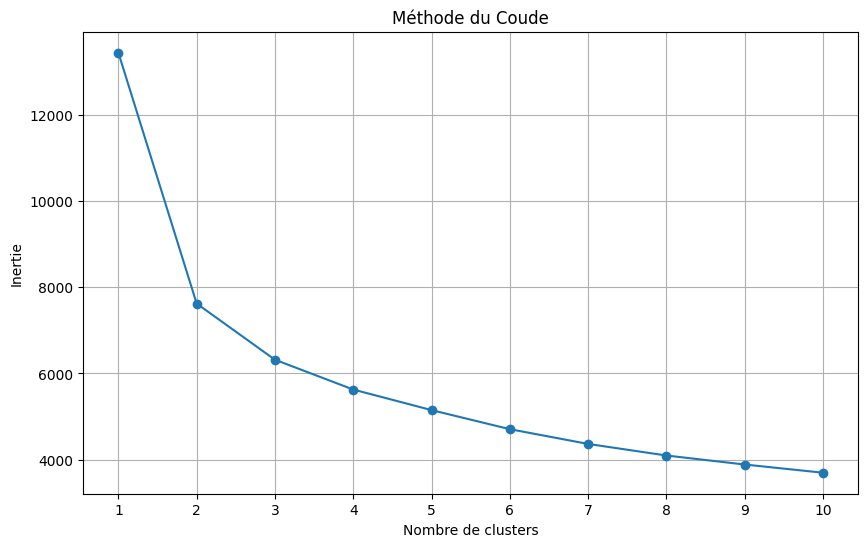

In [53]:
# Supposons que votre DataFrame s'appelle 'mc'
columns_of_interest = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data = mc[columns_of_interest].fillna(mc.mean())  # Remplacer les valeurs manquantes par la moyenne

# Standardiser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Appliquer la méthode du coude pour déterminer le nombre optimal de clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Afficher le graphique de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du Coude')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

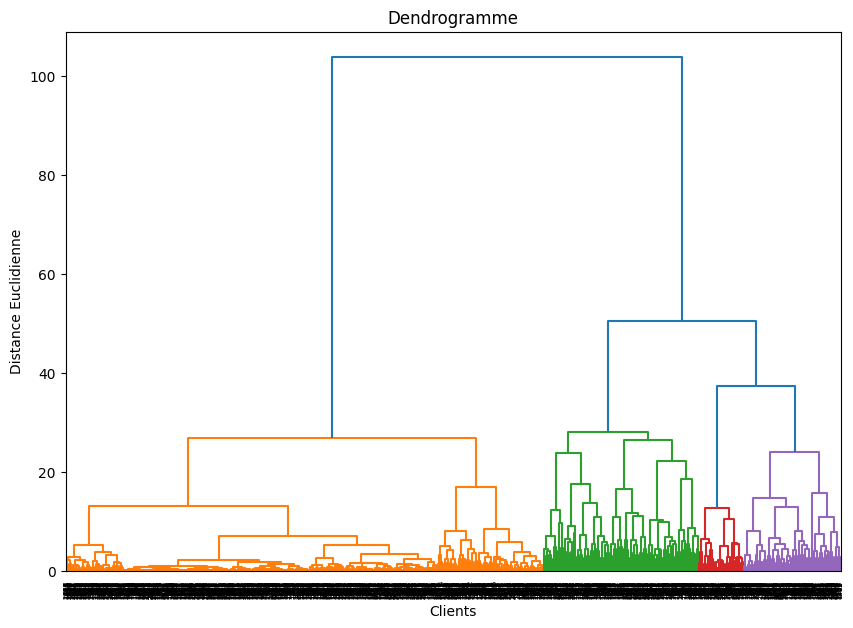

In [54]:
plt.figure(figsize=(10, 7))
plt.title('Dendrogramme')
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'), color_threshold=30)
plt.xlabel('Clients')
plt.ylabel('Distance Euclidienne')
plt.show()

/tmp/ipykernel_1339/4258132220.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = mc[columns_of_interest].fillna(mc.mean())  # Remplacer les valeurs 'Age"manquantes par la moyenne


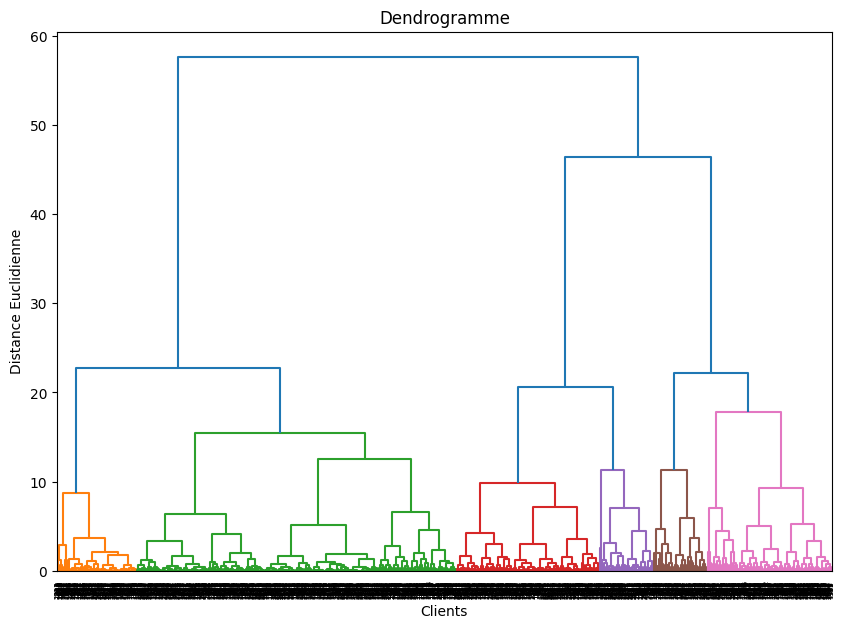

/home/esnault/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


   Age MntWines  Cluster
0   67      635        2
1   70       11        2
2   59      426        1
3   40       11        0
4   43      173        0


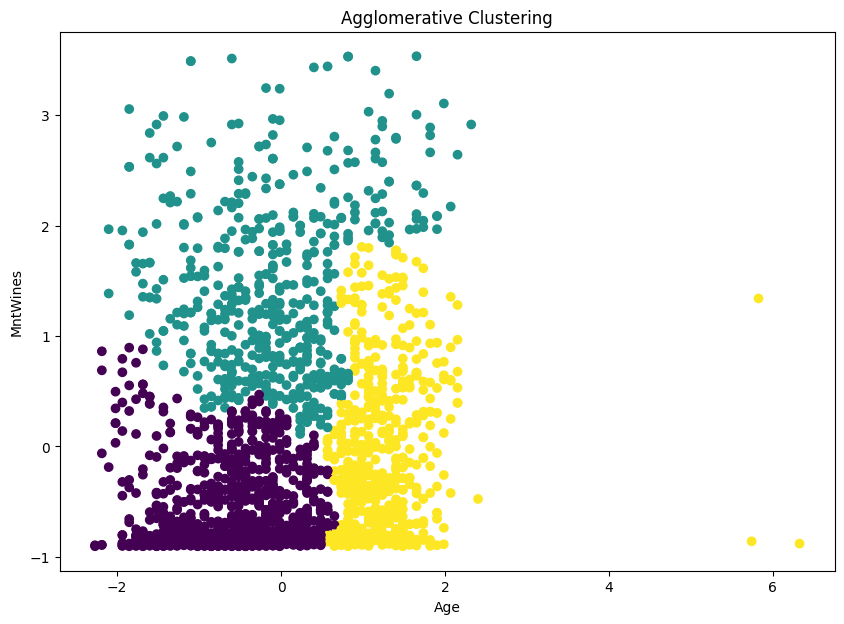

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Charger les données à partir de votre DataFrame (assurez-vous que les colonnes sont correctes)
# Supposons que votre DataFrame s'appelle 'mc'
columns_of_interest = ['Age','MntWines']
data = mc[columns_of_interest].fillna(mc.mean())  # Remplacer les valeurs 'Age"manquantes par la moyenne

# Standardiser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Afficher le dendrogramme pour visualiser les clusters hiérarchiques
plt.figure(figsize=(10, 7))
plt.title('Dendrogramme')
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'), color_threshold=20)
plt.xlabel('Clients')
plt.ylabel('Distance Euclidienne')
plt.show()

# Appliquer l'Agglomerative Clustering en utilisant le nombre optimal de clusters trouvé précédemment (par exemple, 3 clusters)
n_clusters = 3  # Remplacez ce nombre par le nombre optimal de clusters que vous avez trouvé
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
data['Cluster'] = agg_cluster.fit_predict(data_scaled)

# Afficher les clusters
print(data.head())

# Visualiser les clusters dans un scatter plot (utilisez deux des colonnes pour la visualisation)
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['Cluster'], cmap='viridis')
plt.xlabel(columns_of_interest[0])
plt.ylabel(columns_of_interest[1])
plt.title('Agglomerative Clustering')
plt.show()


/tmp/ipykernel_1339/2773006476.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = mc[columns_of_interest].fillna(mc.mean())  # Remplacer les valeurs 'Age"manquantes par la moyenne


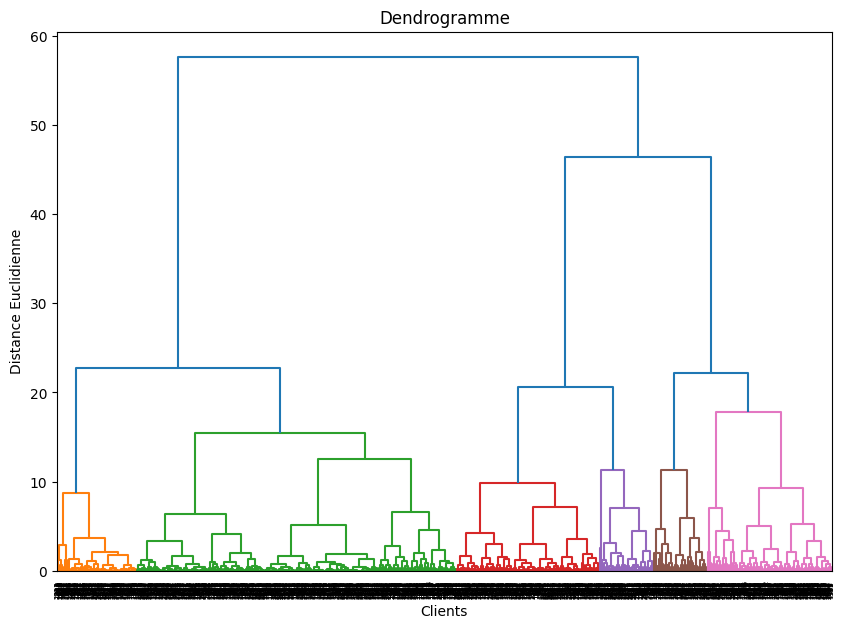

In [64]:
# Charger les données à partir de votre DataFrame (assurez-vous que les colonnes sont correctes)
# Supposons que votre DataFrame s'appelle 'mc'
columns_of_interest = ['Age','MntWines']
data = mc[columns_of_interest].fillna(mc.mean())  # Remplacer les valeurs 'Age"manquantes par la moyenne

# Standardiser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Afficher le dendrogramme pour visualiser les clusters hiérarchiques
plt.figure(figsize=(10, 7))
plt.title('Dendrogramme')
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'), color_threshold=20)
plt.xlabel('Clients')
plt.ylabel('Distance Euclidienne')
plt.show()

/home/esnault/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


   Age MntWines  Cluster
0   67      635        2
1   70       11        2
2   59      426        1
3   40       11        0
4   43      173        0


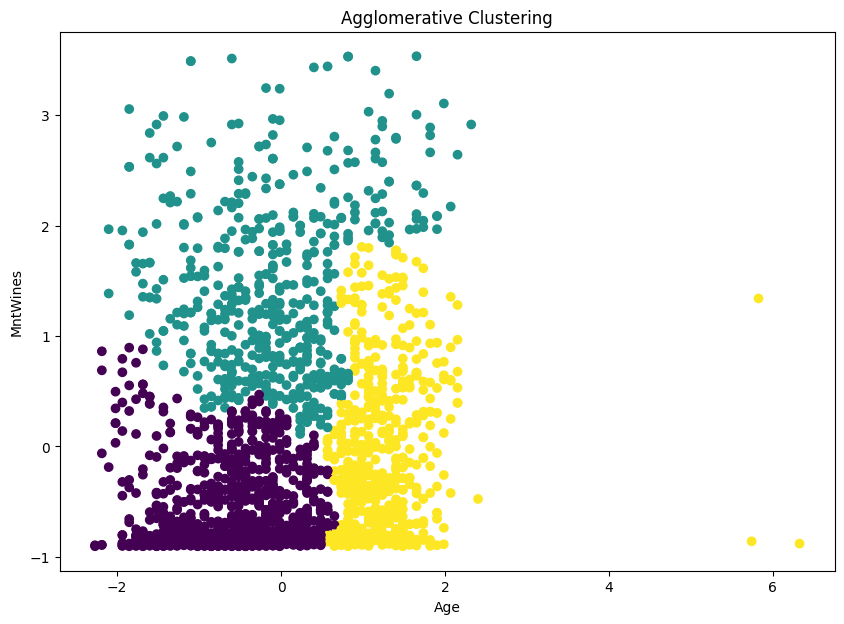

In [65]:
# Appliquer l'Agglomerative Clustering en utilisant le nombre optimal de clusters trouvé précédemment (par exemple, 3 clusters)
n_clusters = 3  # Remplacez ce nombre par le nombre optimal de clusters que vous avez trouvé
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
data['Cluster'] = agg_cluster.fit_predict(data_scaled)

# Afficher les clusters
print(data.head())

# Visualiser les clusters dans un scatter plot (utilisez deux des colonnes pour la visualisation)
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['Cluster'], cmap='viridis')
plt.xlabel(columns_of_interest[0])
plt.ylabel(columns_of_interest[1])
plt.title('Agglomerative Clustering')
plt.show()



In [56]:
#Le but est d'utiliser la technique elbow afin de conclure de combien de cluster on a besoin dans notre modèle de clustering 

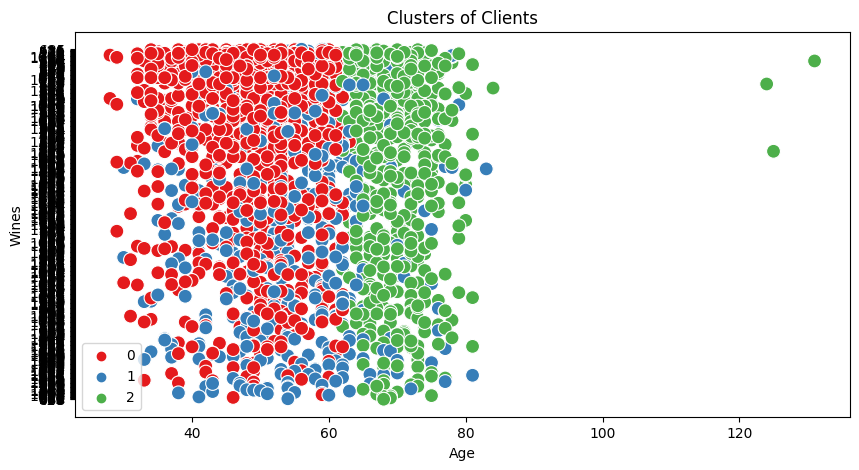

In [57]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=mc['Age'], y=mc['MntWines'], hue=data['Cluster'], palette='Set1', s=100)
plt.title('Clusters of Clients')
plt.xlabel('Age')
plt.ylabel('Wines')
plt.legend()
plt.show()

In [58]:
from sklearn.cluster import AgglomerativeClustering

# Appliquer Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_cluster.fit_predict(data_scaled)

# Calculer le score de silhouette
silhouette_avg = silhouette_score(data_scaled, agg_labels)
print(f"Le score de silhouette pour {n_clusters} clusters est de : {silhouette_avg:.2f}")
print(kmeans.inertia_)


Le score de silhouette pour 3 clusters est de : 0.43
3696.636951688398


In [59]:
# Charger les données à partir de votre DataFrame (assurez-vous que les colonnes sont correctes)
# Supposons que votre DataFrame s'appelle 'mc'
columns_of_interest = ['Income','MntWines']
data = mc[columns_of_interest].fillna(mc.mean())  # Remplacer les valeurs 'Age"manquantes par la moyenne

# Standardiser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Afficher le dendrogramme pour visualiser les clusters hiérarchiques
plt.figure(figsize=(10, 7))
plt.title('Dendrogramme')
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'), color_threshold=20)
plt.xlabel('Clients')
plt.ylabel('Distance Euclidienne')
plt.show()

# Appliquer l'Agglomerative Clustering en utilisant le nombre optimal de clusters trouvé précédemment (par exemple, 3 clusters)
n_clusters = 3  # Remplacez ce nombre par le nombre optimal de clusters que vous avez trouvé
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
data['Cluster'] = agg_cluster.fit_predict(data_scaled)

# Afficher les clusters
print(data.head())

# Visualiser les clusters dans un scatter plot (utilisez deux des colonnes pour la visualisation)
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['Cluster'], cmap='viridis')
plt.xlabel(columns_of_interest[0])
plt.ylabel(columns_of_interest[1])
plt.title('Agglomerative Clustering')
plt.show()

/tmp/ipykernel_1339/2173692205.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = mc[columns_of_interest].fillna(mc.mean())  # Remplacer les valeurs 'Age"manquantes par la moyenne


ValueError: could not convert string to float: ''